
#1º Trabalho de cálculo numérico

Tema1:
O deslocamento da extremidade de um foguete espacial ao entrar na atmosfera da terra é dado pela equação

**f(d) = a.d – d.ln(d)**,

onde d é o deslocamento medido em cm e a é um parâmetro de ajuste para que se projete
um foguete com a máxima segurança e eficiência possível. Caso esse deslocamento passe dos **2 cm** esse
foguete irá explodir, causando sérios danos e um prejuízo gigantesco. Vários testes e simulações são feitos de
modo a garantir que o foguete seja desenvolvido com toda segurança possível. Desenvolva um sistema para
calcular esse deslocamento d da extremidade de um foguete espacial considerando todos os requisitos abaixo:
####a) Implementar algoritmo para calcular d pelo método da Bisseção original.
####b) Implementar algoritmo para calcular d pelo método da Posição Falsa.
####c) Implementar algoritmo para calcular d pelo método de Newton-Raphson.
####d) Testar os seus resultados usando como padrão a = 1, isolamento = (2,3) e e = 10^-5

####e) Fornecer um quadro resposta, variando os valores de a para vários foguetes.
####f) Fornecer um quadro comparativo, com isolamento, raízes e dados para cada método.
####g) Analisar o efeito da variação do valor de a de cada foguete, para cada método dado.
Dados de entrada: n (número de foguetes), a (de cada foguete) e e (precisão).
Dados de saída: quadros resposta (com d e erro para cada foguete e método) e comparativo.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from  math import log

In [ ]:
def bissecao(casas,a,b,ep,func,maxinter = 50):
  if func(a) * func(b) < 0:
    i = 0
    xr = (a+b)/2
    erro = abs(func(xr))
    while i < maxinter and erro > ep:
      # a e a xn estao em lados opostos
      if func(a) * func(xr) < 0:
        b = xr
      # b e a xn estao em lados opostos
      else:
        a = xr
      xr = round((a+b)/2, casas) #arredondar, ajustar o valor para o numero de casas
      erro = abs(func(xr))
      i+=1
      if erro < ep:
        return xr
    return xr
  else:
    return('valores de a e b inválidos para bissecção')
    #return 0


In [ ]:
def falsa_posicao(casas,a,b,ep,func,maxinter = 50):
  if func(a) * func(b) < 0:
    xr = (a*func(b) - b*func(a)) / (func(b) - func(a))
    i = 0
    while i < maxinter:
      if func(a) * func(xr) < 0:
        b = xr
      else:
        a = xr
      xnovo = (a*func(b) - b*func(a)) / (func(b) - func(a))
      erro = abs((xnovo-xr)/xnovo)
      i+=1
      xr = round(xnovo, casas)#arredondar, ajustar o valor para o numero de casas
      if erro < ep:
        return xr

    return xr

  else:
    return('valores inválidos de a e b para falsa posição')
    #return 0

In [ ]:
def newton_raphson(casas, a, b, ep, func, funcd, maxinter = 50):
  if func(a) * func(b) < 0:
    i = 0
    xr = (a+b)/2
    #escolha do valor inicial a partir do intervalo dado, ao inves de uma escolha manual
    erro = abs(func(xr))
    while i < maxinter and erro > ep:
      xr = xr - (func(xr)/funcd(xr))
      i+=1
      erro = abs(func(xr))
      if erro < ep:
        return (round(xr, casas)) #diminuição do número de atribuições

    return (round(xr, casas))

  else:
    return('valores inválidos de a e b para Newthon-Raphson')
    #return 0



Defina o valor de a: 1


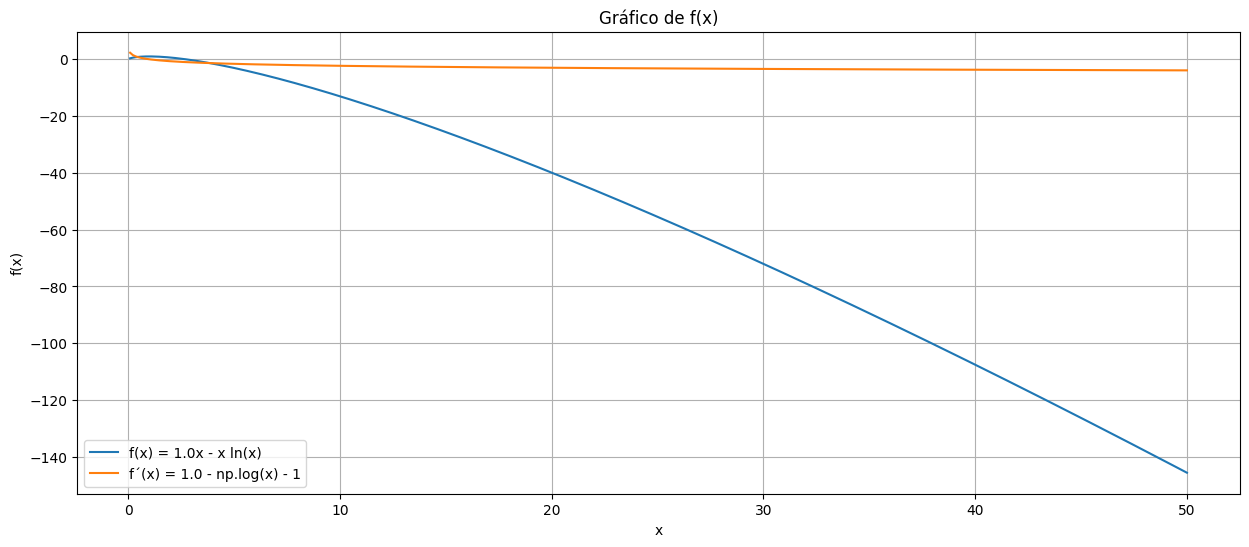

In [ ]:
# Definindo o valor de 'a'
a = float(input('Defina o valor de a: '))
# Definindo a função
def funca(x):
  return a*x - x*np.log(x)
def funcder(x):
  return a - np.log(x) - 1

# Criando um intervalo de valores para x, ajuste os 2 primeiros parâmetros para incluir a raiz
x_values = np.linspace(0.1, 50, 400)

# Calculando os valores de y correspondentes
y_values = funca(x_values)
y_values2 = funcder(x_values)

# Plotando o gráfico
plt.figure(figsize=(15, 6))
plt.plot(x_values, y_values, label=f'f(x) = {a}x - x ln(x)')
plt.plot(x_values, y_values2, label=f'f´(x) = {a} - np.log(x) - 1')
plt.title('Gráfico de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
ep = 0.00001
inferior = float(input('digite o valor inferior do intervalo: '))
superior = float(input('digite o valor superior do intervalo: '))
bisse = bissecao(7,inferior,superior,ep,funca) #especificar o numero de casas na primeira variável da função
falsaPos = falsa_posicao(5,inferior,superior,ep,funca)
NR = newton_raphson(7, inferior, superior, ep, funca, funcder)
#print('Item a')
print(f'Valor para o método da bissecção: {bisse}')
print(f'Valor para o método da falsa Posição: {falsaPos}')

print(f'Valor para o método de Newthon-Raphson: {NR}')

digite o valor inferior do intervalo: 4
digite o valor superior do intervalo: 1
Valor para o método da bissecção: 2.7182846
Valor para o método da falsa Posição: 2.71828
Valor para o método de Newthon-Raphson: 2.7182818
